## Evaluting initial GA vs final GA
Here we run and compare our initial Genetic Algorithm (GA) against the final GA. 
We do this by iterating over travelling salesman problems with an increasing number of cities to observe the result and push the two versions.

In [27]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../src")

from tools import load_csv, plot_routes
from genetics import Params, run_genetic_algorithm
from tools.plot import plot_routes
import time
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def run_experiment(cities: np.ndarray, params: Params):
    start_time = time.time()

    best_route, best_fitness, fitness_history, route_history = run_genetic_algorithm(
        cities,
        params,
    )

    duration = time.time() - start_time
    best_route_length = 1 / best_fitness
    return best_fitness, best_route_length, duration, best_route


def run_experiment_on_datasets(datasets, params: Params):
    res = []
    for dataset in datasets:

        cities = load_csv(dataset)

        print(f"\nRunning Genetic Algorithm on {len(cities)} cities")

        best_fitness, route_length, duration, best_route = run_experiment(cities, params)
        res.append((best_fitness, route_length, duration, best_route))
    return pd.DataFrame(res, columns=["best_fitness", "route_length", "duration", 'best_route'])

In [4]:
def plot_routes_expeiment(df, datasets):
    for index, row in res_tuned.iterrows():
        data_city = load_csv(datasets[index])
        title = f"Best Route for Dataset {index} - {len(row['best_route'])} Cities"
        plot_routes([row['best_route']], data_city, title=title)

In [5]:
datasets = [
    "../data/cities_10_dataset.csv",
    "../data/cities_50_dataset.csv",
    "../data/cities_100_dataset.csv",
    "../data/cities_500_dataset.csv",
    "../data/cities_1000_dataset.csv",
]

## Running the initial GA with no tuned parameters or nearest neighbor initialisation.

In [6]:
res_initial = run_experiment_on_datasets(
    datasets,
    Params(
        population_size=50,
        generations=200,
        elite_size=5,
        tournament_size=3,
        mutation_rate=0.01,
        initial_population="random",
    ),
)


Running Genetic Algorithm on 10 cities

Running Genetic Algorithm on 50 cities

Running Genetic Algorithm on 100 cities

Running Genetic Algorithm on 500 cities

Running Genetic Algorithm on 1000 cities


In [7]:
res_initial

,best_fitness,route_length,duration,best_route
0,0.004082,245.0,0.065058,"[2, 9, 0, 1, 8, 3, 5, 6, 4, 7, 2]"
1,0.001269,788.0,0.114706,"[39, 22, 29, 3, 28, 48, 47, 1, 5, 2, 38, 18, 1..."
2,0.000562,1779.0,0.195160,"[65, 20, 64, 2, 28, 12, 27, 79, 72, 10, 70, 63..."
3,0.000068,14732.0,1.239360,"[113, 363, 100, 495, 17, 411, 449, 114, 468, 3..."
4,0.000028,35110.0,3.171188,"[397, 261, 906, 184, 781, 932, 71, 989, 734, 3..."


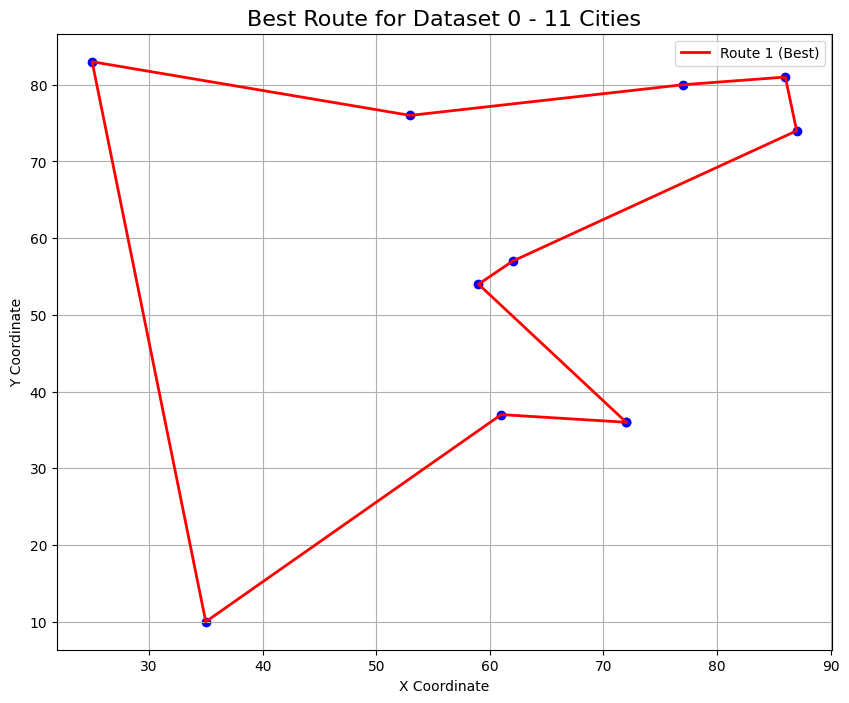

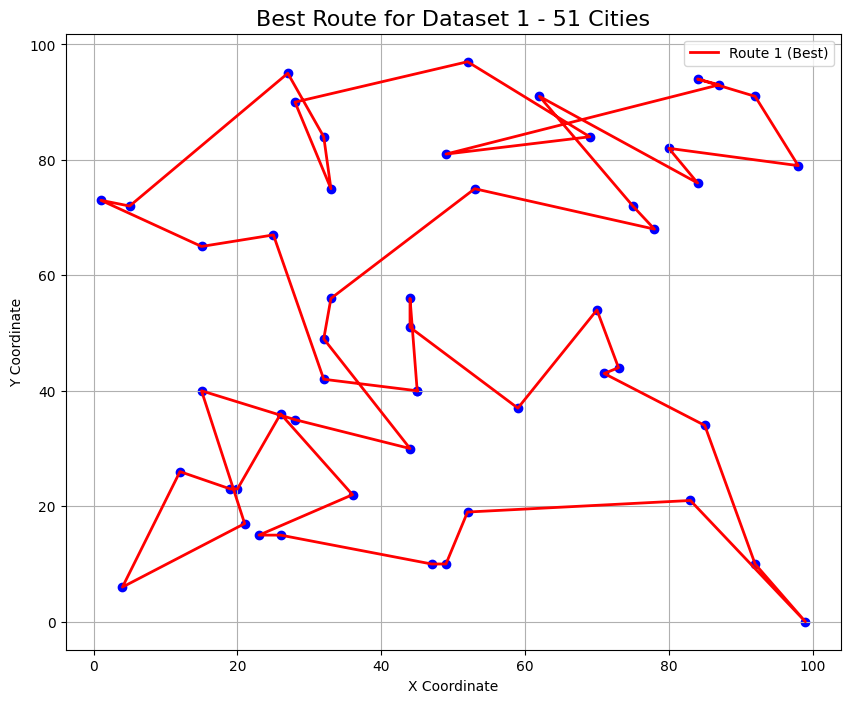

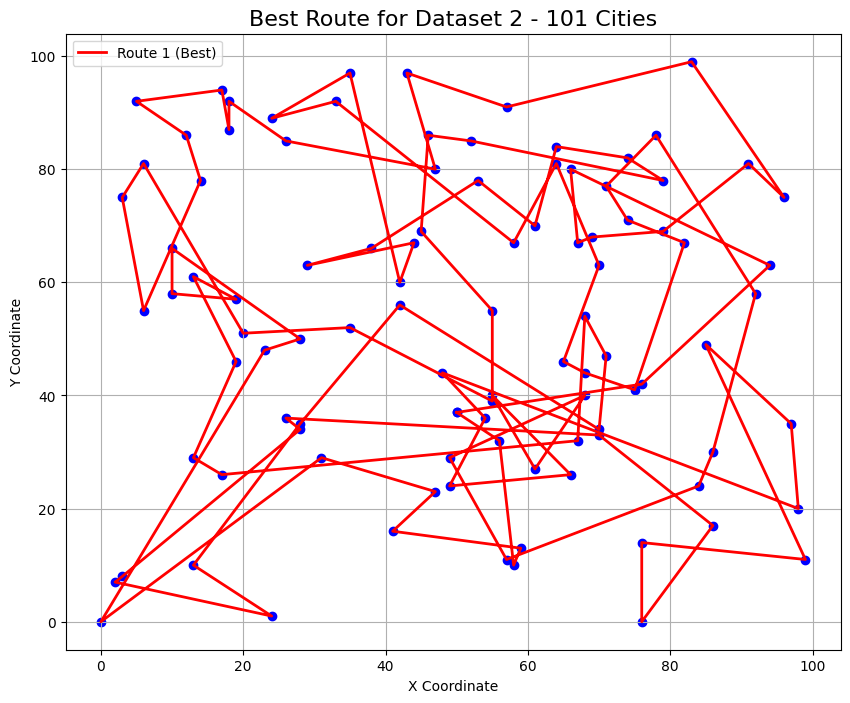

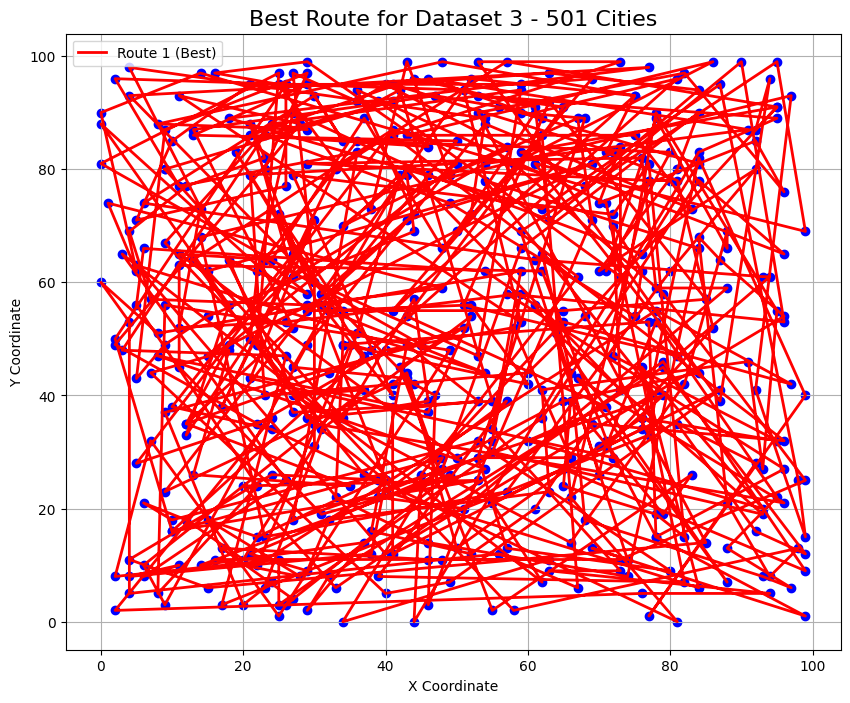

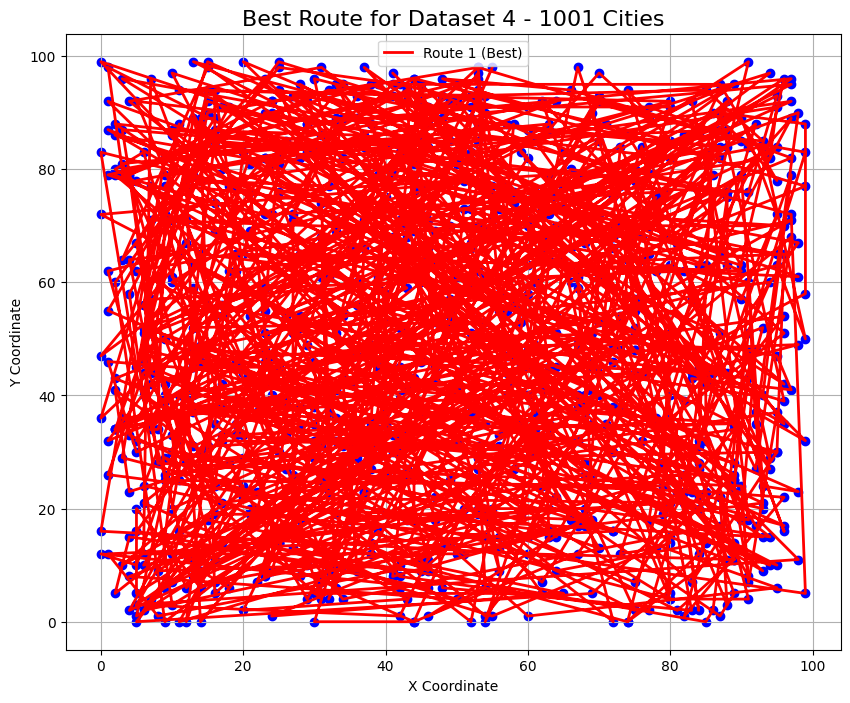

In [8]:
for index, row in res_initial.iterrows():
    data_city = load_csv(datasets[index])
    title = f"Best Route for Dataset {index} - {len(row['best_route'])} Cities"
    plot_routes([row['best_route']], data_city, title=title)

In [10]:
res_tuned = run_experiment_on_datasets(
    datasets,
    Params(
        population_size=700,
        generations=1100,
        elite_size=10,
        tournament_size=20,
        mutation_rate=0.02,
        mutation_type="swap",
        crossover_type="ox",
        initial_population="nn",
    ),
)


Running Genetic Algorithm on 10 cities

Running Genetic Algorithm on 50 cities

Running Genetic Algorithm on 100 cities

Running Genetic Algorithm on 500 cities

Running Genetic Algorithm on 1000 cities


In [11]:
res_tuned

,best_fitness,route_length,duration,best_route
0,0.004082,245.0,5.193129,"[3, 5, 6, 4, 7, 2, 9, 0, 1, 8, 3]"
1,0.001704,587.0,9.457873,"[44, 26, 16, 24, 17, 21, 20, 8, 11, 30, 6, 7, ..."
2,0.001175,851.0,14.514715,"[80, 91, 17, 29, 2, 46, 36, 70, 21, 7, 24, 90,..."
3,0.000565,1769.0,64.416277,"[300, 481, 115, 229, 288, 424, 63, 256, 224, 1..."
4,0.000397,2519.0,136.029014,"[610, 828, 57, 202, 814, 390, 673, 260, 821, 6..."


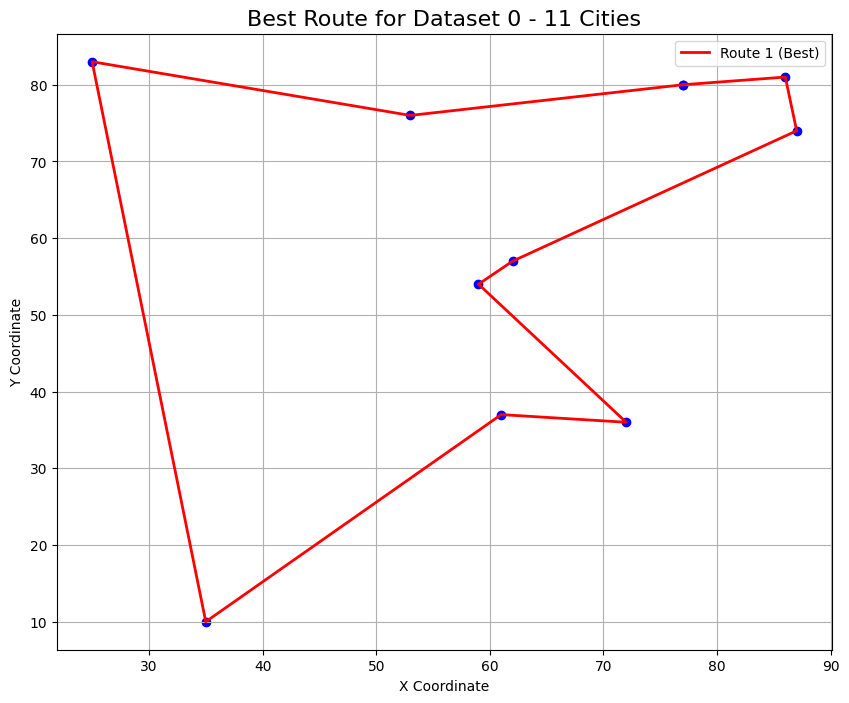

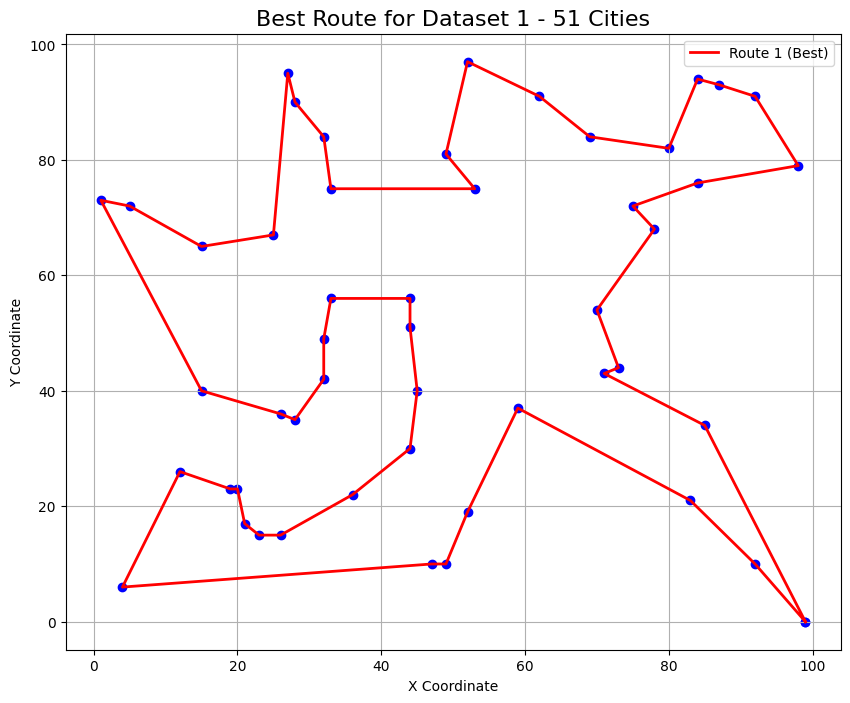

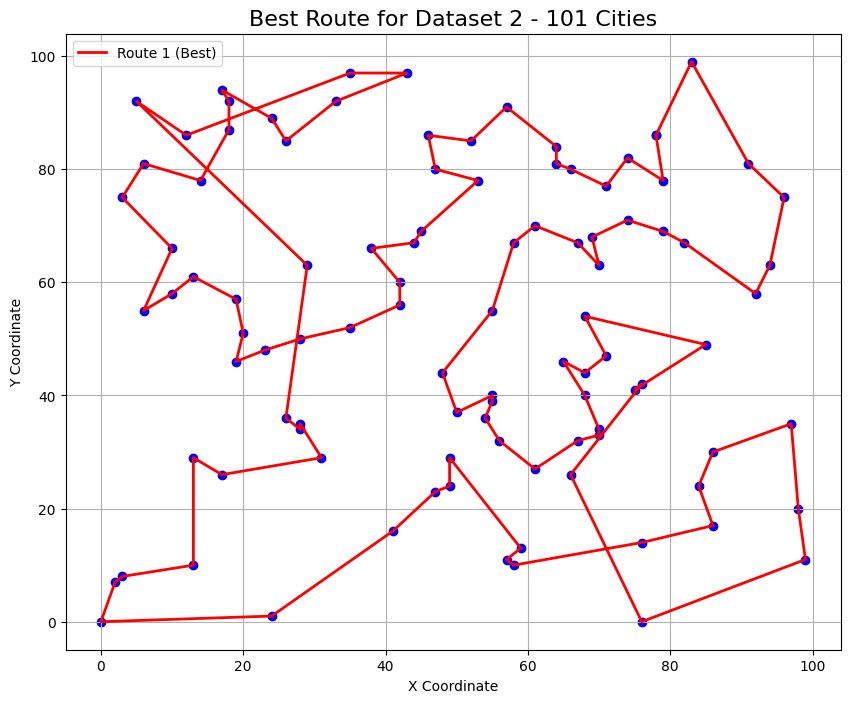

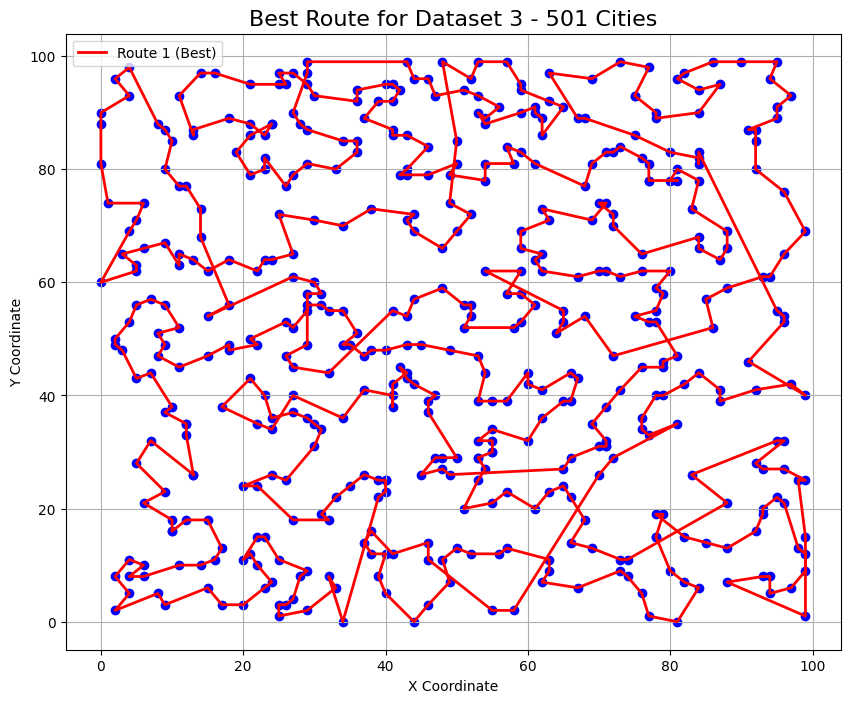

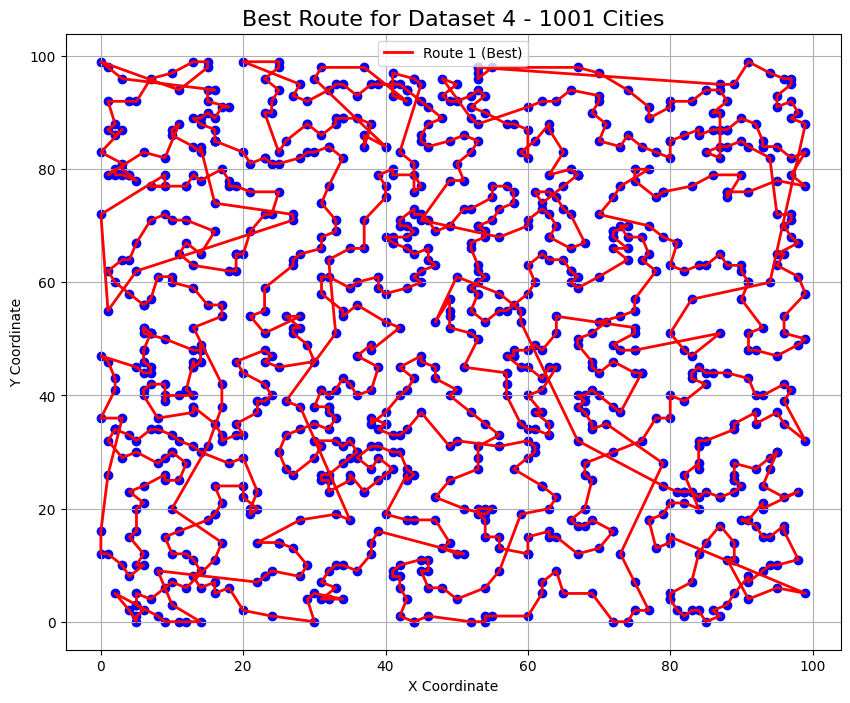

In [12]:
for index, row in res_tuned.iterrows():
    data_city = load_csv(datasets[index])
    title = f"Best Route for Dataset {index} - {len(row['best_route'])} Cities"
    plot_routes([row['best_route']], data_city, title=title)

## Observations

As expected, our tuned parameters finds better paths on the runs with fewer cities, since it was tuned on this sizr. It doesn't perform better on the larger amounts of cities, especially not runtime wise. Could've done additional tuning with respect to runtime so our GA adjusted its parameters based on the size of the dataset, but that's for a future project.

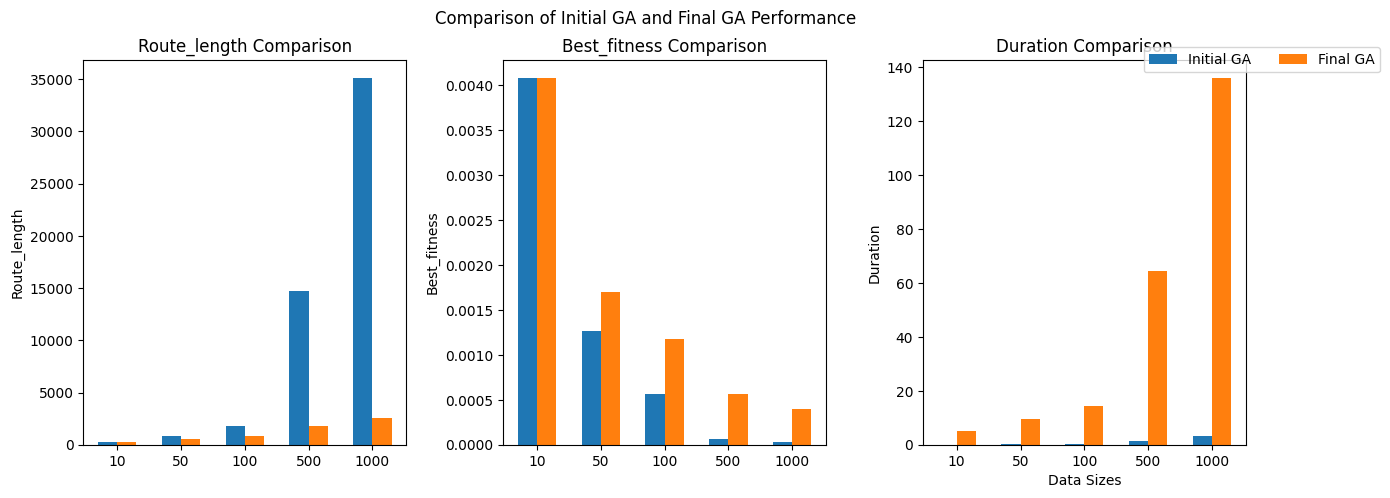

In [13]:
from src.tools.plot import plot_comparison

species = [d.split("_")[1] for d in datasets]
metrics = ["route_length", "best_fitness", "duration"]
plot_comparison(res_initial, res_tuned, species, metrics)

In [28]:
export_data_initial = res_initial.copy().drop(columns=["best_route"])
export_data_initial.rename(columns={"best_fitness": "initial_best_fitness", "route_length": "initial_route_length", "duration": "initial_duration"}, inplace=True)
export_data_tuned = res_tuned.copy().drop(columns=["best_route"])
export_data_tuned.rename(columns={"best_fitness": "tuned_best_fitness", "route_length": "tuned_route_length", "duration": "tuned_duration"}, inplace=True)

final_comparison = pd.concat([export_data_initial, export_data_tuned], axis=1)
final_comparison.to_csv("../data/final_comparison.csv", index=False)